CS249 -- Spring 2016 -- D.S. Parker &copy; 2016

# HW3 -- Diamond Mining

<hr style="border-width:50px;">

#### Assignment Overview

The goal of this assignment is for you to develop models for the <a href="http://docs.ggplot2.org/current/diamonds.html"><b>diamonds</b> dataset</a>,
which is included in the <a href="http://ggplot2.org">ggplot2</a> package.

This is a very simple assignment:  you are asked to build four models:
LDA or QDA, simple Linear Regression, log-scaled Linear Regression, and Logistic Regression.
You then just upload the formulas (R commands) you used to construct these models to CCLE.

<hr style="border-width:20px;">

### Step 0:  build the numeric.diamonds dataset

This notebook includes commands for buiding a dataset called `<code>numeric.diamonds</code>
that you are to use for this assignment.


The diamonds dataset has 3 categorical attributes (cut, color, clarity)
that are <b>ordered</b>.
<i>
The <tt>numeric.diamonds</tt> dataset 
is a numeric version of the diamonds dataset
in which all these categorical attributes are converted to integer codes.
</i>

For example, there are 7 colors, with the ordering: J < I < H < G < F < E < D (J is worst, D is best).
We implement these by replacing J with the value 1,
I with the value 2, ..., and D with the value 7.

After doing this transformation for cut and clarity also,
the result is an entirely numeric dataset called <tt>numeric.diamonds</tt>.

In addition to this notebook, we've provided another called <tt>Diamonds.ipynb</tt> for gaining intuition
about the data by walking through some exploratory graphics.
Many aspects of the dataset are displayed.
You do not have to use this notebook, it is totally optional, but it is included
since visualization can help.

<hr style="border-width:20px;">

### Step 1:  build a training set and test set (as subsets of numeric.diamonds) -- using your UID

First, set the random number generator seed to your UID.
Then generate a training set and test set using the following commands:

<code>
       MY_UID = 123456789 </code><b style="color:blue;">########## you must enter your UCLA UID here !!!</b><code>
       set.seed( MY_UID )

       n = nrow( numeric.diamonds )
       sample.size = 0.75 * n   ###### Use 75% of the data for the training set
       training.row.ids = sample( (1:n), sample.size )
       
       my.training.set = numeric.diamonds[  training.row.ids, ]
       my.test.set     = numeric.diamonds[ -training.row.ids, ]   # set complement of training.set.ids
</code>

<b>
Please use exactly these commands to construct your training set and test set.
Also, use the training set to construct each model,
and use the test set to compute the accuracy of each model.
The grading program will re-compute your model and its accuracy using this method.
</b>

<hr style="border-width:20px;">

### Step 2: compute accuracy of 4 Baseline Models about diamonds

<hr style="border-width:20px;">

### Step 2: build four models about diamonds

For the numeric.diamonds dataset you are to develop a notebook that builds four models in R:
<ol><li>
a LDA or QDA classification model that predicts a diamond's <b>Cut</b>.
</li><li>
a linear regression model that predicts a diamond's <b>Price</b>.
</li><li>
a linear regression model that predicts a diamond's <b>log10(Price)</b>.
</li><li>
a logistic regression model that predicts whether a diamond's <b>Price is above &dollar;1500</b>.
</li></ol>

As an example, you might produce these models:
<ol><li>
<code>  qda( cut ~ price + table + color + clarity,       data=my.training.set )</code>
</li><li>
<code>  lm(  price ~ carat + x + y + z + clarity,         data=my.training.set )</code>
</li><li>
<code>  lm(  log10(price) ~ table + log10(carat) + color, data=my.training.set )</code>
</li><li>
<code>  glm( I(price>1500) ~ carat + table + clarity,     data=my.training.set, family = binomial )</code>
</li></ol>

As these examples show, details matter:
<b>you must specify the complete formula for each model in detail, listing all variables included.</b>

Please choose attributes that produce the most accuracy models you can.
More accurate models will get a higher score; see below.

<hr style="border-width:20px;">

### Step 3: generate a CSV file "HW3_output.csv" including your 4 models

If these were your four models, then to complete the assignment you would create
a CSV file <tt>HW3_output.csv</tt> containing eight lines:

<code>
      33.333, qda( cut ~ .,           data=my.training.set )
      88.888, lm(  price ~ .,         data=my.training.set )
      77.777, lm(  log10(price) ~ .,  data=my.training.set )
      88.888, glm( I(price>1500) ~ ., data=my.training.set, family=binomial )
      44.444, qda( cut ~ price + table + color + clarity, data=my.training.set )
      99.999, lm( price ~ carat + x + y + z + clarity, data=my.training.set )
      99.999, lm( log10(price) ~ table + log10(carat) + color, data=my.training.set )
      99.999, glm( I(price>1500) ~ carat + table + clarity, data=my.training.set, family=binomial )
</code>

<b>Each line gives the accuracy of a model <u>on <tt>my.test.set</tt></u></b>
as well as <b>the exact command you used to generate the model</b>.
There is no length restriction on the lines.

<hr style="border-width:20px;">

### Step 4: upload your CSV file and notebook to CCLE

Finally, go to CCLE and upload:
<ul><li>
your output CSV file <tt>HW3_output.csv</tt>
</li><li>
your notebook file <tt>HW3_Diamond_Mining.ipynb</tt>
</li></ul>

We are not planning to run any of the uploaded notebooks.
However, your notebook should have the commands you used in developing your models ---
in order to show your work.
As announced, all assignment grading in this course will be automated,
and the notebook is needed in order to check results of the grading program.

<hr style="border-width:50px;">

## Rules -- building accurate models

### All evaluation of your models' accuracy will be done using your Training and Test data.

As mentioned above, everyone will generate their own Training set and Test set
<b style="color:blue;">after setting the random number seed to their UID</b>.
The measure of accuracy will be determined by your Test set.

As a result, in this assignment everyone has their own accuracy objective function,
defined by their UID.

Also: if you do not set the seed with your UID, your accuracy measures will differ from the
ones produced by the grading program.

### Models must be constructed using the functions lda(), qda(), lm(), and glm()

You must use the <tt>lm</tt>, <tt>glm</tt>, <tt>lda</tt> and <tt>qda</tt> functions to compute your models.
Both <tt>lda()</tt> and <tt>qda()</tt> are in the <tt>MASS</tt> package.)
To produce a logistic regression model, you must include the option <tt>family=binomial</tt>, or equivalently <tt>family=binomial("logit")</tt>.

However, you have complete control over which variables are used in your model,
and over which transformations you apply to the variables.
So many different models are possible.

### "Accuracy" is a standard measure of performance for models

For LDA and QDA, and for logistic regression,
the accuracy measure is the percentage of correct classifications.
For linear regressions a standard measure is $R^2$.
You must implement these measures as described below.

### The grading program will compare your model's accuracy against a baseline model, using your data

The grading program will use these baseline models:
<code>
      qda( cut ~ .,           data=my.training.set )
      lm(  price ~ .,         data=my.training.set )
      lm(  log10(price) ~ .,  data=my.training.set )
      glm( I(price>1500) ~ ., data=my.training.set, family=binomial )
</code>

For each of the four baseline models, you must do two things:
<ol><li>
(18 points):  compute the accuracy of the baseline model.
</li><li>
(7 points):  find a model that has higher accuracy than the baseline model.
</li></ol>

It is not difficult to get 4 &ast; 18 = 72 points on this assignment.
However, 4 models that are better than the baseline will give 4 &ast; 25 = 100 points.

### After grading, we will produce a list of models designed by the class

Since accuracy of the models is part of the HW score, make the models as accurate as you can.
Some of your score on this assignment will depend on the accuracy of your models.
All models will be compiled into a list and distributed at the end, so everyone can see the models
that were developed and how they compared.


<hr style="border-width:50px;">

# Generation of the numeric.diamonds Dataset

## Use this transformed dataset for building all Models in this assignment

In [2]:
# we need the ggplot2 package to get the "diamonds" dataset

not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("ggplot2")) install.packages("ggplot2", repos="http://cran.rstudio.com/")
    
if (not.installed("devtools")) install.packages("devtools", dependencies = TRUE, repos = "http://cran.rstudio.com/")
library(devtools)
    
if (not.installed("ggbiplot")){
#    library(RCurl)
#    library(httr)
#    set_config( config( ssl_verifypeer = 0L ) )
    install_github("vqv/ggbiplot")
}
library(ggbiplot)

Loading required package: ggplot2
Loading required package: plyr
Loading required package: scales
Loading required package: grid


In [2]:
sessionInfo()

R version 3.2.2 (2015-08-14)
Platform: x86_64-apple-darwin11.4.2 (64-bit)
Running under: OS X 10.11.3 (El Capitan)

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] ggbiplot_0.55   scales_0.4.0    plyr_1.8.3      ggplot2_2.1.0  
[5] devtools_1.11.1

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.4      digest_0.6.9     withr_1.0.1      IRdisplay_0.3   
 [5] repr_0.3         gtable_0.2.0     jsonlite_0.9.17  magrittr_1.5    
 [9] evaluate_0.8     stringi_1.0-1    uuid_0.1-2       IRkernel_0.5    
[13] tools_3.2.2      stringr_1.0.0    munsell_0.4.3    colorspace_1.2-6
[17] base64enc_0.1-3  rzmq_0.7.7       memoise_1.0.0   

In [4]:
data(diamonds, package="ggplot2")

summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

The dataset has the following columns:
<table>
<tr><td>   <b>carat</b></td><td>weight of the diamond in carats, rounded to an integer  (1 carat = 0.2 grams)</td></tr>
<tr><td>   <b>cut</b></td><td>quality of the cut  {Fair, Good, VeryGood, Premium, Ideal}</td></tr>
<tr><td>   <b>color</b></td><td>color code: &lbrace; J &lt; I &lt; H &lt; G &lt; F &lt; E &lt; D &rbrace;  (J is worst, D is best)</td></tr>
<tr><td>   <b>clarity</b></td><td>clarity code: &lbrace; I1 &lt; SI1 &lt; SI2 &lt; VS1 &lt; VS2 &lt; VVS1 &lt; VVS2 &lt; IF &rbrace; (I1 is worst, IF is best)</td></tr>

<tr><td>   <b>depth</b></td><td>total depth percentage  =  2*z/(x+y)</td></tr>
<tr><td>   <b>table</b></td><td>width of top of diamond relative to widest point</td></tr>

<tr><td>   <b>price</b></td><td>in US dollars</td></tr>

<tr><td>   <b>x</b></td><td>Length in mm (numeric value between 0 and 6)</td></tr>
<tr><td>   <b>y</b></td><td>Width  in mm (numeric value between 0 and 9)</td></tr>
<tr><td>   <b>z</b></td><td>Depth  in mm (numeric value between 0 and 6)</td></tr>

</table>

Caution:  the datset has skewed distributions.  Please check below.


In [4]:
dim(diamonds)  # not a tiny dataset

[1] 53940    10

In [ ]:
# low_prices = subset( diamonds$price, diamonds$price<5000 )

# hist( low_prices, breaks=200, col="green",
#      main = "diamond prices below $5000; notice the odd gap around 1500")

In [ ]:
# log-scaling the prices makes patterns clearer

# hist( log10(diamonds$price), breaks=50, col="skyblue",
#      main="distribution of log10(price) looks like a mixture" )

# plot(sort(log10(diamonds$price)), pch=".", col="skyblue")

## Basic cleaning of the data

In [6]:
diamonds = subset( diamonds, (x>0) & (y>0) & (z>0) )  #  There are actually some zero values, we omit them.

### Prepare numeric encodings of "ordered categorical" values for Cut, Color, and Clarity

In [7]:
colnames(diamonds)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [8]:
( colors = levels(diamonds$color) )

[1] "D" "E" "F" "G" "H" "I" "J"

In [9]:
## The levels of Colors should have the reverse ordering
##  { D > E > F > G > H > I > J }
##  (J is worst, D is best)

( levels(diamonds$color) = rev(colors) )

[1] "J" "I" "H" "G" "F" "E" "D"

In [10]:
( cuts = levels(diamonds$cut) )

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"

In [ ]:
## The levels of Cuts have the correct ordering

In [11]:
( clarities = levels(diamonds$clarity) )

[1] "I1"   "SI2"  "SI1"  "VS2"  "VS1"  "VVS2" "VVS1" "IF"

In [12]:
## The levels of Clarity should have ordering
##  { I1 < SI1 < SI2 < VS1 < VS2 < VVS1 < VVS2 < IF }
##  (I1 is worst, IF is best)

( levels(diamonds$clarity) = clarities[c(1,3,2,5,4,7,6,8)] )
#  reorder the factor levels of 'clarity' so that they match the real ordering.

[1] "I1"   "SI1"  "SI2"  "VS1"  "VS2"  "VVS1" "VVS2" "IF"

### Convert the categorical values to integers -- using the unclass() function.

In [13]:
numeric.diamonds = transform( diamonds,
                              cut = as.numeric(unclass(diamonds$cut)),
                              color = as.numeric(unclass(diamonds$color)),
                              clarity = as.numeric(unclass(diamonds$clarity))
                   )

In [13]:
levels(diamonds$cut)
table( diamonds$cut, numeric.diamonds$cut )

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"

           
                1     2     3     4     5
  Fair       1609     0     0     0     0
  Good          0  4902     0     0     0
  Very Good     0     0 12081     0     0
  Premium       0     0     0 13780     0
  Ideal         0     0     0     0 21548

In [14]:
levels(diamonds$color)
table( diamonds$color, numeric.diamonds$color )

[1] "J" "I" "H" "G" "F" "E" "D"

   
        1     2     3     4     5     6     7
  J  6774     0     0     0     0     0     0
  I     0  9797     0     0     0     0     0
  H     0     0  9538     0     0     0     0
  G     0     0     0 11284     0     0     0
  F     0     0     0     0  8298     0     0
  E     0     0     0     0     0  5421     0
  D     0     0     0     0     0     0  2808

In [15]:
levels(diamonds$clarity)
table( diamonds$clarity, numeric.diamonds$clarity )

[1] "I1"   "SI1"  "SI2"  "VS1"  "VS2"  "VVS1" "VVS2" "IF"

      
           1     2     3     4     5     6     7     8
  I1     738     0     0     0     0     0     0     0
  SI1      0  9185     0     0     0     0     0     0
  SI2      0     0 13063     0     0     0     0     0
  VS1      0     0     0 12254     0     0     0     0
  VS2      0     0     0     0  8170     0     0     0
  VVS1     0     0     0     0     0  5066     0     0
  VVS2     0     0     0     0     0     0  3654     0
  IF       0     0     0     0     0     0     0  1790

### Inspect correlations among the Numeric Diamonds variables, as a check

In [16]:
diamonds.correlation.matrix = cor( numeric.diamonds )

round( diamonds.correlation.matrix, 2 )

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.00,-0.13,0.29,-0.35,0.03,0.18,0.92,0.98,0.95,0.96
cut,-0.13,1.00,-0.02,0.19,-0.22,-0.43,-0.05,-0.13,-0.12,-0.15
color,0.29,-0.02,1.00,0.03,0.05,0.03,0.17,0.27,0.26,0.27
clarity,-0.35,0.19,0.03,1.00,-0.07,-0.16,-0.15,-0.37,-0.36,-0.37
depth,0.03,-0.22,0.05,-0.07,1.00,-0.30,-0.01,-0.03,-0.03,0.10
table,0.18,-0.43,0.03,-0.16,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,-0.05,0.17,-0.15,-0.01,0.13,1.00,0.89,0.87,0.87
x,0.98,-0.13,0.27,-0.37,-0.03,0.20,0.89,1.00,0.97,0.98
y,0.95,-0.12,0.26,-0.36,-0.03,0.18,0.87,0.97,1.00,0.96
z,0.96,-0.15,0.27,-0.37,0.10,0.15,0.87,0.98,0.96,1.00


In [17]:
# Quick PCA of a sample of the data, to see if everything looks OK

n = nrow(numeric.diamonds)
sample.size = 2000

sample.row.ids = sample( (1:n), sample.size )

numeric.diamonds.sample = numeric.diamonds[sample.row.ids, ]

diamonds.sample = diamonds[sample.row.ids, ]

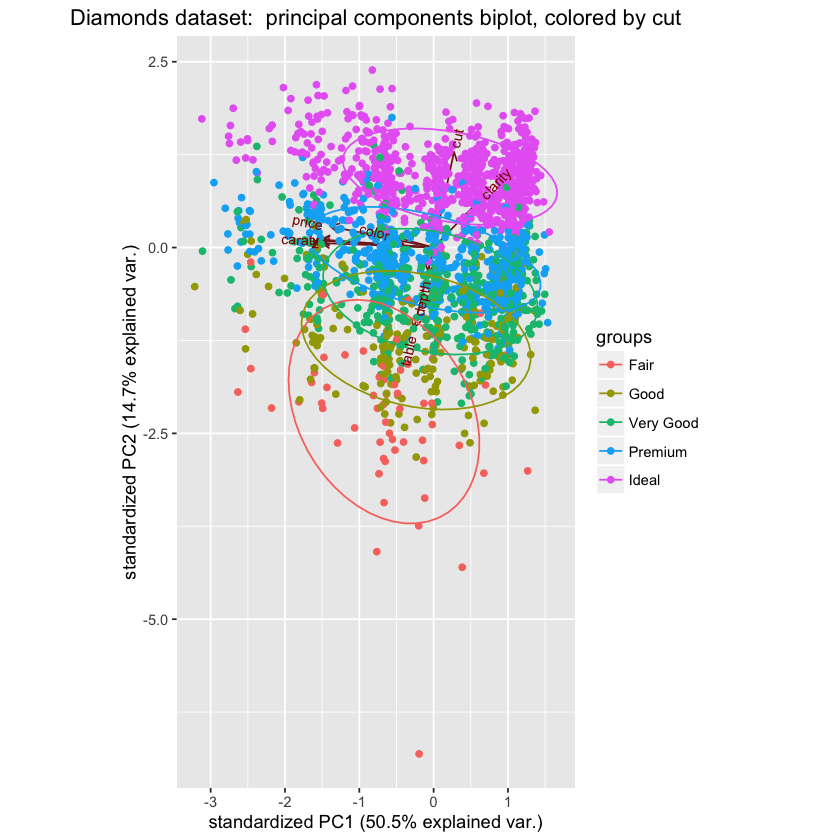

In [18]:
numeric.diamonds.pca = prcomp(numeric.diamonds.sample, scale.=TRUE)
## biplot( numeric.diamonds.pca, xlabs=rep(".",sample.size) )

ggbiplot( numeric.diamonds.pca, var.scale = 1,
          groups = diamonds$cut[sample.row.ids], ellipse = TRUE ) +
          labs(title = "Diamonds dataset:  principal components biplot, colored by cut")

# More visualization examples are in the notebook  Diamonds.ipynb

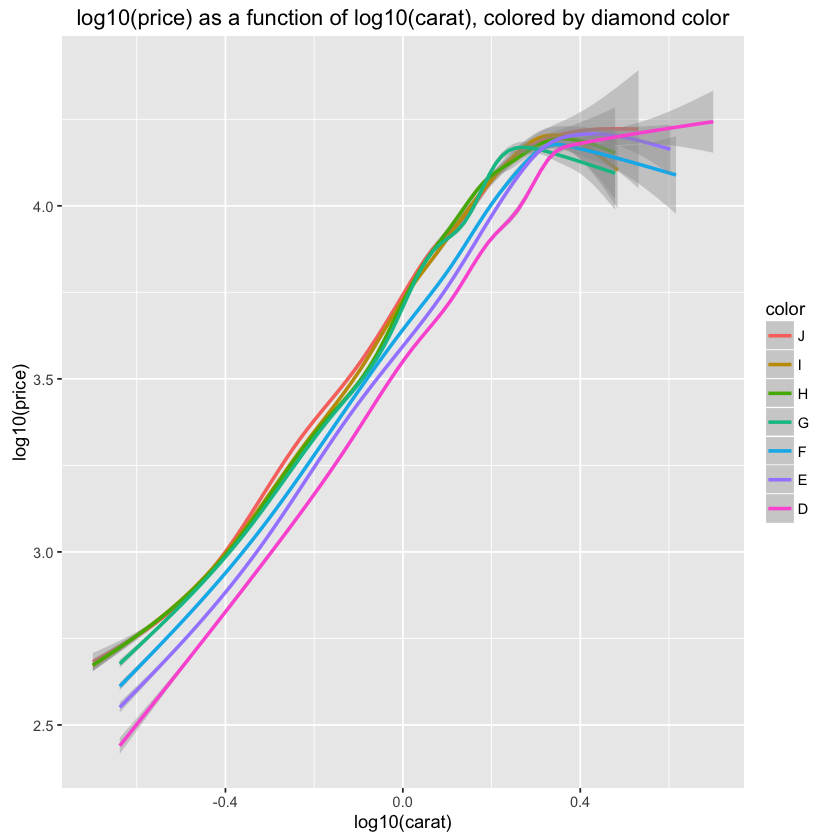

In [19]:
ggplot(data=diamonds, aes(x=log10(carat), y=log10(price), color=color)) + geom_smooth() +
     ggtitle( "log10(price) as a function of log10(carat), colored by diamond color")

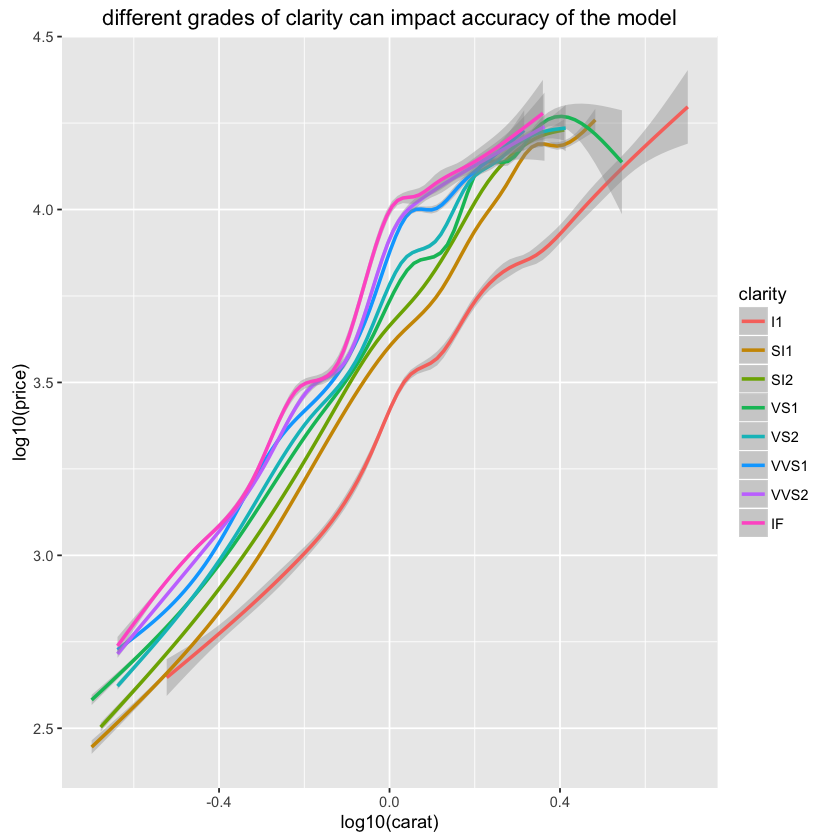

In [20]:
ggplot(data=diamonds, aes(x=log10(carat), y=log10(price), color=clarity)) +
     geom_smooth() +
     ggtitle( "different grades of clarity can impact accuracy of the model")

In [ ]:
### another interesting plot, suggesting impacts on linearity by cut
# ggplot(data=diamonds, aes(x=log10(carat), y=log10(price), color=cut)) + geom_smooth() +
#     ggtitle( "log10(price) as a function of log10(carat), colored by cut")

<hr style="border-width:50px;">

# Step 1:  generate your Training Set and Test Set from numeric.diamonds

In [114]:
#  Please use exactly the following statements to generate these things:


set.seed( 504588536 ) ########## please enter your UCLA UID here !!!


n = nrow(numeric.diamonds)

training.sample.size = 0.75 * n  ###### Use 75% of the data for the training set

training.row.ids = sample( (1:n), training.sample.size )
       
my.training.set = numeric.diamonds[  training.row.ids, ]
my.test.set     = numeric.diamonds[ -training.row.ids, ]   # set complement of training.set.ids


In [116]:
dim(my.training.set)
dim(my.test.set)

[1] 40440    10

[1] 13480    10

# Step 2:  compute Accuracy of the 4 Baseline Models on your Test Set

As mentioned above, there are 4 Baseline Models:
<code>
      qda( cut ~ .,           data=my.training.set )
      lm(  price ~ .,         data=my.training.set )
      lm(  log10(price) ~ .,  data=my.training.set )
      glm( I(price>1500) ~ ., data=my.training.set, family=binomial )
</code>

Develop procedures to compute their accuracy:
one for classification models
(like lda() and qda() in the MASS package),
one for linear regression models (like lm()),
and one for logistic regression models (like glm(family=binomial)).

See the section <b>Measuring Accuracy of Models in this Assignment</b> below.


Then: use your procedures to compute the accuracy of the Baseline Models on your Test Set.

In [117]:
library(MASS)

In [231]:
class_accuracy = function(model, test_features, test_labels){
    pd = predict(model, test_features)
    correct = (pd$class == test_labels)
    return (sum(correct) / length(test_labels))
}

In [192]:
linear_accuracy = function(model, test_features, test_labels){
    pd = predict(model, test_features)
    return (var(pd) / var(test_labels))
}

In [311]:
logistic_accuracy = function(model, test_features, test_labels){
    pd = round(predict(model, test_features, type="response"))
    correct = (test_labels == pd)
    return (sum(correct) / length(test_labels))
}

In [242]:
lda_base = lda( cut ~ ., data=my.training.set )
qda_base = qda( cut ~ ., data=my.training.set )
lm_base = lm( price ~ ., data=my.training.set )
lmlog_base = lm( log10(price) ~ ., data=my.training.set )
logistic_base = glm( I(price>1500) ~ ., data=my.training.set, family=binomial )

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

In [259]:
# lda_base_accu = round(class_accuracy(lda_base, my.test.set, my.test.set$cut), digits=5)
# print(lda_base_accu)
qda_base_accu = round(class_accuracy(qda_base, my.test.set, my.test.set$cut), digits=5) * 100
print(qda_base_accu)
qda1 = c(qda_base_accu, "qda( cut ~ ., data=my.training.set )")

[1] 54.221


In [354]:
lm_base_accu = round(linear_accuracy(lm_base, my.test.set, my.test.set$price), digits=5) * 100
print(lm_base_accu)
#lm1 = c(lm_base_accu, toString(summary(lm_base)$call))
lm1 = c(lm_base_accu, "lm(price ~ ., data=my.training.set )")

lmlog_base_accu = round(linear_accuracy(lmlog_base, my.test.set, log10(my.test.set$price)), digits=5) * 100
print(lmlog_base_accu)
lmlog1 = c(lmlog_base_accu, "lm(log10(price) ~ ., data=my.training.set)")

[1] 90.472
[1] 97.879


In [347]:
binary_labels = as.numeric(my.test.set$price > 1500)
logistic_base_accu = round(logistic_accuracy(logistic_base, my.test.set, binary_labels), digits=5) * 100
print(logistic_base_accu)
logistic1 = c(logistic_base_accu, "glm(I(price>1500) ~ ., data=my.training.set, family=binomial)")

[1] 97.982


# Step 2:  build 4 Models improving on the Baseline Models

## Problem 1:  a LDA or QDA classification model that predicts a diamond's Cut.

An example of a possible model is:
<code>
sample_m1  =  qda( cut ~ price + table + color + clarity,       data=my.training.set )
</code>

If this model outperforms the first Baseline Model, you are done.

In [133]:
sample_m1  =  qda( cut ~ price + table + color + clarity,data=my.training.set )

In [343]:
m1_accu = round(class_accuracy(sample_m1, my.test.set, my.test.set$cut), digits=5) * 100
print(m1_accu)
qda2 = c(m1_accu, "qda( cut ~ price + table + color + clarity, data=my.training.set )")

[1] 60.349


## Problem 2:  a linear regression model that predicts Price.

An example of a possible model is:
<code>
sample_m2  =  lm(  price ~ carat + x + y + z + clarity,         data=my.training.set )
</code>

In [278]:
lm_improved  =  lm(  price ~ carat + color + clarity + x + cut + depth + table,         data=my.training.set )

In [348]:
lm2_accu = round(linear_accuracy(lm_improved, my.test.set, my.test.set$price), digits=5) * 100
print(lm2_accu)
lm2 = c(lm2_accu, "lm(price ~ carat + color + clarity + x + cut + depth + table, data=my.training.set)")

[1] 90.482


## Problem 3: a linear regression model that predicts log10(Price).

An example of a possible model is:
<code>
sample_m3  =  lm(  log10(price) ~ table + log10(carat) + color, data=my.training.set )
</code>

In [286]:
lmlog_improved  =  lm(  log10(price) ~ carat + color + clarity + x + cut + depth + table, data=my.training.set )

In [349]:
lmlog2_accu = round(linear_accuracy(lmlog_improved, my.test.set, log10(my.test.set$price)), digits=5) * 100
print(lmlog2_accu)
lmlog2 = c(lmlog2_accu, "lm(log10(price) ~ carat + color + clarity + x + cut + depth + table, data=my.training.set)")

[1] 97.891


## Problem 4:  a logistic regression model that predicts whether Price is above &dollar;1500.

An example of a possible model is:
<code>
sample_m4  =  glm( I(price>1500) ~ carat + table + clarity,   data=my.training.set, family = binomial )
</code>

Notice that the values of <code>I(price>1500)</code> are always 0 or 1.
This model's predictions will be <b>0</b> if the price is below &dollar;1500,
and <b>1</b> if the price is above &dollar;1500, so the resulting values are "binomial".

The dataset includes information on about 50 thousand diamonds.
About 20 thousand have a price below &dollar;1500; and the others have a price above.

Thus a model that always simply predicts prices above &dollar;1500 might be right about 60% of the time.
Your job is to do better than this baseline rate.


In [330]:
logistic_improved =  glm( I(price>1500) ~ carat+cut+color+clarity+depth+table+x+y,   data=my.training.set, family = binomial )

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

In [352]:
logistic2_accu = round(logistic_accuracy(logistic_improved, my.test.set, binary_labels), digits=5) * 100
print(logistic2_accu)
logistic2 = c(logistic2_accu, "glm(I(price>1500) ~ carat+cut+color+clarity+depth+table+x+y, data=my.training.set, family = binomial)")

[1] 97.99


# Step 3: generate a CSV file "HW3_output.csv" including your 4 models

If these were your four models, then to complete the assignment you would create
a CSV file <tt>HW3_output.csv</tt> containing eight lines:

<code>
      33.333, qda( cut ~ .,           data=my.training.set )
      88.888, lm(  price ~ .,         data=my.training.set )
      77.777, lm(  log10(price) ~ .,  data=my.training.set )
      88.888, glm( I(price>1500) ~ ., data=my.training.set, family=binomial )
      44.444, qda( cut ~ price + table + color + clarity, data=my.training.set )
      99.999, lm( price ~ carat + x + y + z + clarity, data=my.training.set )
      99.999, lm( log10(price) ~ table + log10(carat) + color, data=my.training.set )
      99.999, glm( I(price>1500) ~ carat + table + clarity, data=my.training.set, family=binomial )
</code>

<b>Each line gives the accuracy of a model <u>on <tt>my.test.set</tt></u></b>
as well as <b>the exact command you used to generate the model</b>.
There is no length restriction on the lines.

In [355]:
retval = c()
retval = append(retval, paste(qda1, collapse=","))
retval = append(retval, paste(lm1, collapse=",")) 
retval = append(retval, paste(lmlog1, collapse=",")) 
retval = append(retval, paste(logistic1, collapse=",")) 
retval = append(retval, paste(qda2, collapse=","))
retval = append(retval, paste(lm2, collapse=",")) 
retval = append(retval, paste(lmlog2, collapse=",")) 
retval = append(retval, paste(logistic2, collapse=",")) 

print(retval)

[1] "54.221,qda( cut ~ ., data=my.training.set )"                                                                
[2] "90.472,lm(price ~ ., data=my.training.set )"                                                                
[3] "97.879,lm(log10(price) ~ ., data=my.training.set)"                                                          
[4] "97.982,glm(I(price>1500) ~ ., data=my.training.set, family=binomial)"                                       
[5] "60.349,qda( cut ~ price + table + color + clarity, data=my.training.set )"                                  
[6] "90.482,lm(price ~ carat + color + clarity + x + cut + depth + table, data=my.training.set)"                 
[7] "97.891,lm(log10(price) ~ carat + color + clarity + x + cut + depth + table, data=my.training.set)"          
[8] "97.99,glm(I(price>1500) ~ carat+cut+color+clarity+depth+table+x+y, data=my.training.set, family = binomial)"


In [356]:
write(retval, "HW3_output.csv")

# Step 4: upload your CSV file and notebook to CCLE

Upload the files HW3_output.csv <u>and</u> your Jupyter notebook.

<hr style="border-width:50px;">

# Background Material

## R Formulas, Models, and the General Linear Model:

Chapter 11 of the <a href="https://cran.r-project.org/doc/manuals/R-intro.pdf">R Introduction Manual</a>
gives a good description of formulas, models, model updating (exploring alternative models), and the GLM.

<hr style="border-width:20px;">

### R formulas:

Sections 11.1 in Chapter 11 of the <a href="https://cran.r-project.org/doc/manuals/R-intro.pdf">R Introduction Manual</a>
hs a good description of formulas.  A few constructs are important for this assignment:
<ul><li> <b>Including an Intercept</b>:
<br/>
<code>  y ~ x</code><br/>
<code>  y ~ x + 1</code><br/>
<code>  y ~ 1 + x</code><br/>
An intercept is included by default,
so all of these formulas correspond to the same simple linear regression model of <code>y</code> on <code>x</code>.
<br/>
</li><li> <b>Omitting the Intercept</b>:
<br/>
<code>  y ~  x - 1</code><br/>
<code>  y ~  x + 0</code><br/>
<code>  y ~  0 + x</code><br/>
<code>  y ~ -1 + x</code><br/>
These formulas are all equivalent,
and correspond to the linear regression of <code>y</code> on <code>x</code> without an intercept.
<br/>
</li><li> <b>Log-transformed Variables</b>:
<br/>
<code>  log(y) ~ x</code><br/>
Regression on <code>x</code> of the transformed variable <code>log(y)</code> (with an implicit intercept term).
<br/>
</li><li> <b>Integer Powers of a Variable</b>:
<br/>
<code>  y ~ x^2</code><br/>
<code>  y ~ 1 + x + I(x^2)</code><br/>
<code>  y ~ poly(x,2)</code><br/>
regression of y on a quadratic polynomial of x.
<u>The first two formulas are equivalent --
the power <code>x^2</code> implicitly includes the powers below it.</u>
The third formula looks very similar, but is not completely equivalent:
it uses "orthogonal" polynomials (with no interaction between each other),
while the first two formulas use explicit powers, and interactions between them are considered.
<br/>
Note that the expression  <code>I(x^2)</code> represents an "insulated" new variable
whose values are squares of values of <code>x</code>.
<!--
<br/>
</li><li> <b>Integer Powers of a Variable</b>:
y ~ A*B
y ~ A + B + A:B
y ~ B %in% A
y ~ A/B Two factor non-additive model of y on A and B. The first two specify the same
crossed classification and the second two specify the same nested classification. In
abstract terms all four specify the same model subspace.
<br/>
</li><li> <b>Integer Powers of a Variable</b>:
y ~ (A + B + C)^2
y ~ A*B*C - A:B:C
Three factor experiment but with a model containing main effects and two factor
interactions only. Both formulae specify the same model.
<br/>
</li><li> <b>Integer Powers of a Variable</b>:
y ~ A * x
y ~ A/x
y ~ A/(1 + x) - 1
Separate simple linear regression models of y on x within the levels of A, with
different codings. The last form produces explicit estimates of as many different
intercepts and slopes as there are levels in A.
-->
</li></ul>

<hr style="border-width:20px;">

### Functions on R models:

Sections 11.3 in Chapter 11 of the <a href="https://cran.r-project.org/doc/manuals/R-intro.pdf">R Introduction Manual</a>
also gives a good description of functions on models that one can use:
<ul><li>
<b>coef</b>(model) <br/>
Extract the regression coefficient (matrix).
Long form: coefficients(object).
<br/>
<br/>
</li><li>
<b>formula</b>(model) <br/>
Extract the model formula.
<br/>
<br/>
</li><li>
<b>plot</b>(model) <br/>
Produce four plots, showing residuals, fitted values and some diagnostics.
<br/>
<br/>
</li><li>
<b>predict</b>(model, newdata=data.frame) <br/>
The data frame supplied must have variables specified with the same labels as the
original. The value is a vector or matrix of predicted values corresponding to the
determining variable values in data.frame.
<br/>
<br/>
</li><li>
<b>residuals</b>(model) <br/>
Extract the (matrix of) residuals, weighted as appropriate.
<br/>
<br/>
</li><li>
<b>step</b>(model) <br/>
Select a suitable model by adding or dropping terms and preserving hierarchies. The
model with the smallest value of AIC (Akaike’s An Information Criterion) discovered
in the stepwise search is returned.
<br/>
<br/>
</li><li>
<b>summary</b>(model) <br/>
Print a comprehensive summary of the results of the regression analysis.
<br/>
<br/>
</li><li>
<b>vcov</b>(model) <br/>
Returns the variance-covariance matrix of the main parameters of a fitted model
object.
</li></ul>

<hr style="border-width:20px;">

### The General Linear Model:

Sections 11.6 in Chapter 11 of the <a href="https://cran.r-project.org/doc/manuals/R-intro.pdf">R Introduction Manual</a>
includes a tutorial on the GLM, and options for the glm() function.

Relevant for this assignment:
<ul><li>
<code>glm(x ~ y, family = gaussian )</code>
    is equivalent to the usual linear regression model
<code>lm( x ~ y )</code>    
</li><li>
<code>glm(x ~ y, family = gaussian("log") )</code>
    is equivalent to the log-linear model
<code>lm( log(x) ~ y )</code>   
</li><li>
<code>glm(x ~ y, family = binomial )</code>
    is the logistic regression model
</li></ul>

<hr style="border-width:50px;">

# Example:  Building a Model (simple supervised learning)

### This example, discussed in class, uses the MASS package for supervised learning of LDA models.

### Construct a training set and test set (from the Iris dataset)

In [159]:
data(iris)

n = nrow(iris)

training.sample.size = floor( 0.75 * n )  ###### Use 75% of the data for the training set

iris.ids = (1:n)

training.set = sample( iris.ids, training.sample.size ) # Generate a random sample
test.set     = iris.ids[-training.set]       # The set complement of training.set

training.set

# table(iris$Species)                  # Tabulate the number of each species
# table(iris$Species[training.set])    # Tabulate species for the training set
# table(iris$Species[test.set])        # Tabulate species for the test set

[1]  31   5  61 141  77 114 136  84  44 150 131 145  54 105  64  73  83  94
 [19]  26  20  29  97 124  92  57  53  33   8  19 118  91  88  38  23  40 140
 [37] 121  63  17 113 137 109   4 120  95  58  46 138  69 143  39  55 129 116
 [55]  13  51  27 127  42  45  30  56  12  66  41  99  21  80  72  47 101  67
 [73]  37 146 106 139  96 125  28  85  10 142  90  70  87  24  89 123   6   9
 [91] 115 103  78  86 104  59  49  15  52 149  35   2  81 102  79  65  14 144
[109]   3 132 108 128

### Constructing an LDA model

In [160]:
if (!(is.element("MASS", installed.packages())))  install.packages("MASS")
library(MASS)

LDA.model = lda( Species ~ ., data = iris, subset = training.set )
LDA.model

Call:
lda(Species ~ ., data = iris, subset = training.set)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3303571  0.3482143  0.3214286 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa         4.989189    3.386486     1.467568   0.2405405
versicolor     5.941026    2.756410     4.269231   1.3307692
virginica      6.627778    3.011111     5.583333   2.0750000

Coefficients of linear discriminants:
                    LD1        LD2
Sepal.Length  0.7419518 -0.2985006
Sepal.Width   1.6090057 -1.9018536
Petal.Length -1.9789126  1.3971462
Petal.Width  -3.3672547 -3.4471854

Proportion of trace:
   LD1    LD2 
0.9887 0.0113 

### Simple accuracy calculation (for a classification model)

In [139]:
predictions = predict( LDA.model, subset=test.set, data=iris )

incorrect.predictions  =  (predictions$class != iris$Species[test.set] )

incorrect.ids <-  test.set[incorrect.predictions]

# iris[ incorrect.ids , ]

Warning message:
In is.na(e1) | is.na(e2): longer object length is not a multiple of shorter object lengthWarning message:
In `!=.default`(predictions$class, iris$Species[test.set]): longer object length is not a multiple of shorter object length

In [30]:
confusion.matrix = table( iris$Species[test.set], predictions$class )
confusion.matrix

ERROR: Error in table(iris$Species[test.set], predictions$class): all arguments must have the same length


ERROR: Error in eval(expr, envir, enclos): object 'confusion.matrix' not found


In [ ]:
accuracy = (training.sample.size - length(incorrect.ids)) / training.sample.size
accuracy

<hr style="border-width:50px;">

# Examples:  Measuring Accuracy of Models in this Assignment

## Accuracy of an LDA or QDA model is the percentage of correct classifications

## Accuracy of a Logistic Regression model is the percentage of correct classifications

# Examples: Converting between categorical and numeric variables

R uses a jargon for categorical values that some find confusing:
<ul><li>
a categorical variable is called a <b>factor</b>
</li><li>
the set of all possible factor values is called its <b>levels</b>
</li><li>
the levels of a factor are not the same thing as strings --- they are symbolic values.
</li></ul>

This may seem odd at first, but it is very useful, and it is easy to get used to.

In [ ]:
# Levels of a factor

levels(iris$Species)

In [ ]:
#  Altering the names of levels (dangerous)

levels(iris$Species) = c( 'Setosa', 'Versicolor', 'Virginica' )
levels(iris$Species)

In [ ]:
# Converting numeric values to levels:

cut.factor = as.factor( numeric.diamonds$cut )
levels(cut.factor)

In [ ]:
# Converting numeric values to levels:

cut.factor.numeric = unclass( cut.factor )
# cut.factor.numeric = as.numeric( cut.factor )    ## more or less equivalent

unique( cut.factor.numeric )  # find all unique values (in a list of values)


<hr style="border-width:50px;">

# Examples: Transforming variables to make them more nearly Gaussian

In [ ]:
# ?transform

transformed.diamonds  =  transform(
                                   numeric.diamonds,
                                   log10_carat = log10(carat)
                                  )

#  this example transform adds a log10_carat column 

In [ ]:
opar = par(mfrow=c(2,1))

data = numeric.diamonds$price

hist( data, probability=TRUE, col="deepskyblue", breaks=50)
curve( dnorm(x,mean(data),sd(data)), col="red", lwd=3, add=TRUE)
abline( v=1500, col="green", lwd=3 )
mtext( "green line:  price = 1500" )
           
hist( log10(data), probability=TRUE, col="deepskyblue", breaks=50)
curve( dnorm(x,mean(log10(data)),sd(log10(data))), col="red", lwd=3, add=TRUE)
abline( v=log10(1500), col="green", lwd=3)
mtext( "green line:  price = 1500" )
  
par(opar)

In [ ]:
ggplot( data=diamonds, aes(x=log10(price), y=log10(table), color=cut)) +
        geom_smooth() + ggtitle("This doesn't look very linear (for some cuts)")

In [ ]:
#  Possibly of interest:
#  Box-Cox transformations are a popular way of making variables closer to Gaussian

# library(MASS)
# help(boxcox)
# example(boxcox)

<hr style="border-width:50px;">

## fyi: regsubsets() might be useful for improving regression models

In [266]:
if (!(is.element("leaps", installed.packages())))  install.packages("leaps",repos="http://cran.rstudio.com/")
  
library(leaps)

#  regsubsets() generates regression models for subsets of sizes up to nvmax
#  regsubsets( y ~ x, data=D, nbest=3 )  #  generates the 3 best models of each size

# ?regsubsets


The downloaded source packages are in
	‘/private/var/folders/y3/c2_hy7g939vfm1pzttvb78_r0000gn/T/RtmpLJRtzg/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### regsubsets() searches for the best subsets of the variables

In [318]:
rs = regsubsets( I(price>1500) ~ ., data=numeric.diamonds, nbest=3, nvmax=7 )

summary(rs)

Subset selection object
Call: regsubsets.formula(I(price > 1500) ~ ., data = numeric.diamonds, 
    nbest = 3, nvmax = 7)
9 Variables  (and intercept)
        Forced in Forced out
carat       FALSE      FALSE
cut         FALSE      FALSE
color       FALSE      FALSE
clarity     FALSE      FALSE
depth       FALSE      FALSE
table       FALSE      FALSE
x           FALSE      FALSE
y           FALSE      FALSE
z           FALSE      FALSE
3 subsets of each size up to 7
Selection Algorithm: exhaustive
         carat cut color clarity depth table x   y   z  
1  ( 1 ) " "   " " " "   " "     " "   " "   "*" " " " "
1  ( 2 ) " "   " " " "   " "     " "   " "   " " " " "*"
1  ( 3 ) " "   " " " "   " "     " "   " "   " " "*" " "
2  ( 1 ) "*"   " " " "   " "     " "   " "   "*" " " " "
2  ( 2 ) "*"   " " " "   " "     " "   " "   " " " " "*"
2  ( 3 ) " "   " " "*"   " "     " "   " "   "*" " " " "
3  ( 1 ) "*"   " " " "   " "     "*"   " "   "*" " " " "
3  ( 2 ) "*"   " " " "   " "     " "   "

In [298]:
rs.summary = summary(rs)
str(rs.summary)

List of 8
 $ which : logi [1:7, 1:10] TRUE TRUE TRUE TRUE TRUE TRUE ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "1" "2" "3" "4" ...
  .. ..$ : chr [1:10] "(Intercept)" "carat" "cut" "color" ...
 $ rsq   : num [1:7] 0.623 0.75 0.766 0.771 0.776 ...
 $ rss   : num [1:7] 4742 3145 2945 2877 2819 ...
 $ adjr2 : num [1:7] 0.623 0.75 0.766 0.771 0.776 ...
 $ cp    : num [1:7] 37402 6648 2799 1492 370 ...
 $ bic   : num [1:7] -52598 -74731 -78262 -79511 -80605 ...
 $ outmat: chr [1:7, 1:9] " " "*" "*" "*" ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "1  ( 1 )" "2  ( 1 )" "3  ( 1 )" "4  ( 1 )" ...
  .. ..$ : chr [1:9] "carat" "cut" "color" "clarity" ...
 $ obj   :List of 28
  ..$ np       : int 10
  ..$ nrbar    : int 45
  ..$ d        : num [1:10] 53920 70089 259952 126072 99424 ...
  ..$ rbar     : num [1:45] 5.73 57.46 4.05 61.75 3.54 ...
  ..$ thetab   : num [1:10] 0.62889 0.32691 0.00244 0.00663 0.01529 ...
  ..$ first    : int 2
  ..$ last     : int 10
  

In [299]:
cat('subset of variables included in each model:\n#var')
print(rs.summary$which * 1)

subset of variables included in each model:
#var  (Intercept) carat cut color clarity depth table x y z
1           1     0   0     0       0     0     0 1 0 0
2           1     1   0     0       0     0     0 1 0 0
3           1     1   0     0       0     1     0 1 0 0
4           1     1   0     0       1     1     0 1 0 0
5           1     1   0     1       1     1     0 1 0 0
6           1     1   0     1       1     1     1 1 0 0
7           1     1   0     1       1     1     1 1 0 1


In [300]:
N = nrow(rs.summary$which)
for (i in 1:N) {
    cat(sprintf('\n----- model %d: ----------------------\n', i))
    print( coef(rs, i) )
    cat(sprintf(" R^2:  %7.3f\n", rs.summary$rsq[i] ))
    cat(sprintf(" BIC:    %8.4g\n", rs.summary$bic[i] ))
}


----- model 1: ----------------------
(Intercept)           x 
 -1.3237310   0.3406756 
 R^2:    0.623
 BIC:    -5.26e+04

----- model 2: ----------------------
(Intercept)       carat           x 
  -4.051695   -1.732807    1.057788 
 R^2:    0.750
 BIC:    -7.473e+04

----- model 3: ----------------------
(Intercept)       carat       depth           x 
-7.02431859 -1.89217529  0.04394636  1.12514857 
 R^2:    0.766
 BIC:    -7.826e+04

----- model 4: ----------------------
(Intercept)       carat     clarity       depth           x 
-7.40402849 -1.92354046  0.02340111  0.04656114  1.15105031 
 R^2:    0.771
 BIC:    -7.951e+04

----- model 5: ----------------------
(Intercept)       carat       color     clarity       depth           x 
-7.39642790 -1.88502774 -0.02046754  0.02643117  0.04747389  1.14522303 
 R^2:    0.776
 BIC:    -8.06e+04

----- model 6: ----------------------
 (Intercept)        carat        color      clarity        depth        table 
-7.983599382 -1.89060515

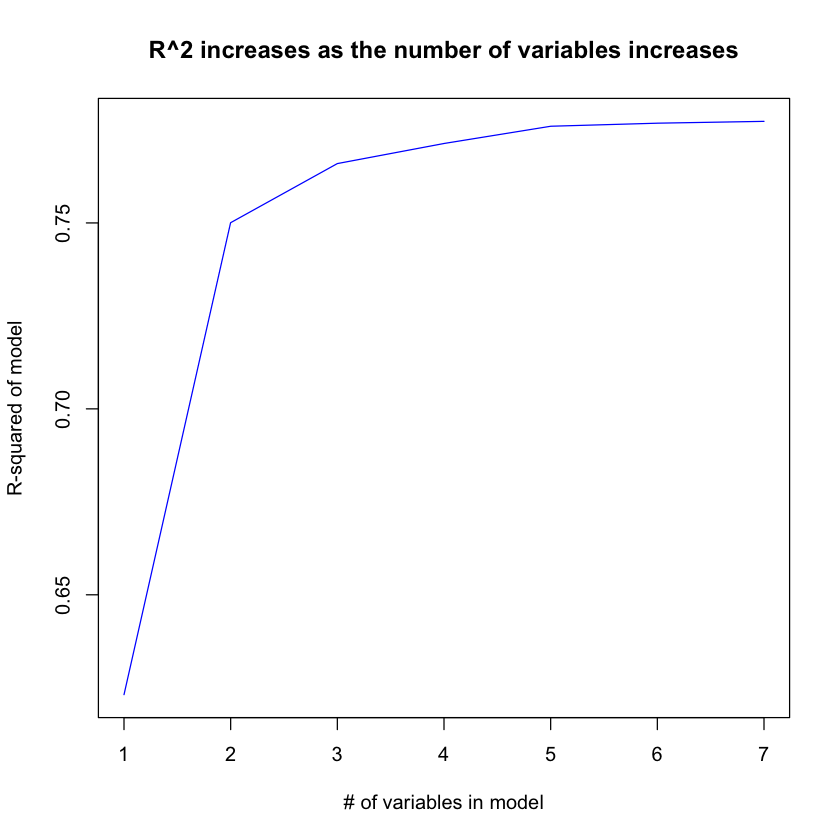

In [301]:
plot(rs.summary$rsq, type="l", col="blue",
     xlab="# of variables in model", ylab="R-squared of model",
     main="R^2 increases as the number of variables increases")

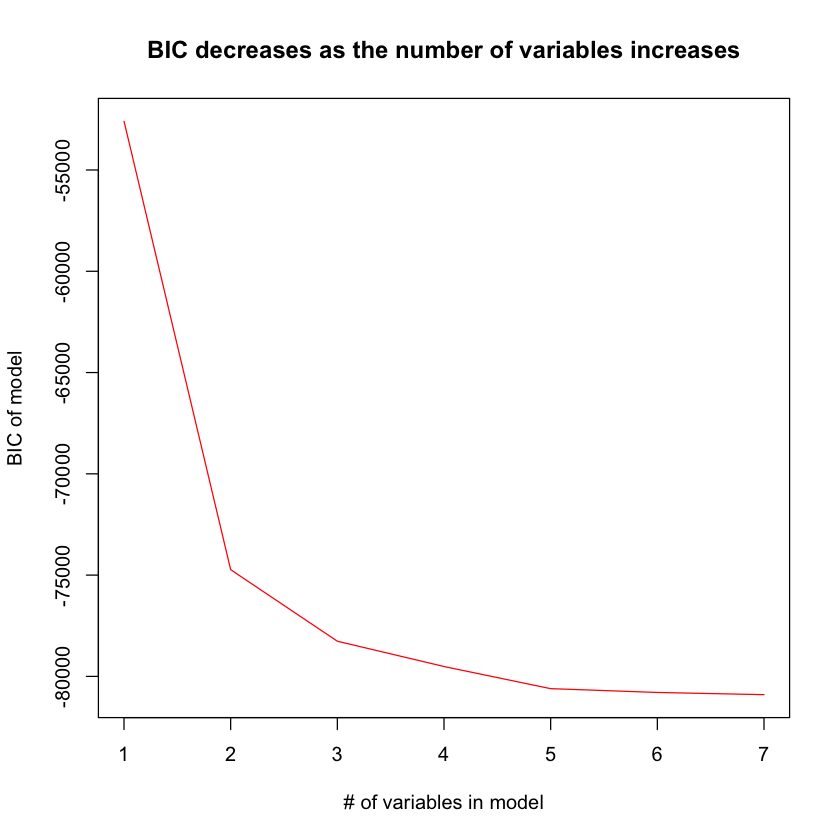

In [302]:
plot(rs.summary$bic, type="l", col="red",
     xlab="# of variables in model", ylab="BIC of model",
     main="BIC decreases as the number of variables increases")

In [ ]:
# ?summary.regsubsets